# Import paczek

In [101]:
!pip install -q tensorflow==2.0

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Załadowanie danych

Załadowane zbioru treningowego (elementy i labela'e) oraz testowego (elementy i label'e)

In [103]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Eksploracja danych

Sprawdzenie jak wyglądają dane, jakie mają wymiary itp.

In [104]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255,
        247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36, 

Przegląd elemetów z labelami

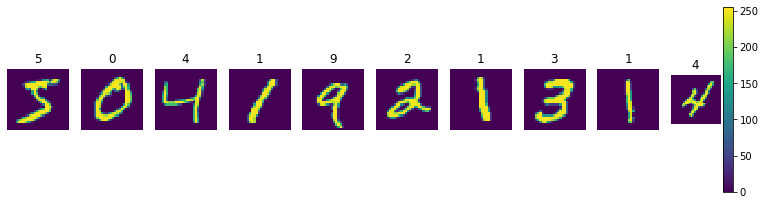

In [126]:
plt.figure(figsize=(13,13)) #tworzy obiekt
for i in range(1,11): #1-11, bo nie może być index 0
    plt.subplot(1,10,i) #wiersze, kolumny, index
    plt.axis('off') #linie siatki-wyłączone
    plt.imshow(X_train[i-1]) #i-1, bo i jest 1, a nie 0 jak w numeracji listy
    plt.title(y_train[i-1]) #labela jako tytuły do poszególnych obrazków
plt.colorbar()
plt.show()

# Budowa sieci

### Ułożenie po kolei warstw

In [107]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #przekształca dane z dwuwymiarowej tablicy na jednowymiarową; nie uczy się a tylko formatuje dane, aby były łatwiejsze
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) #warswty gęsto połączone; zwracają 10 logów, oznaczających każdy z możliwych klas
])

### Kompilowanie

In [108]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Ogólne przedstawienie sieci

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trening modelu

In [110]:
training = model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 2.7379 - accuracy: 0.8700
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3694 - accuracy: 0.9141
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2837 - accuracy: 0.9302
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2477 - accuracy: 0.9393
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2190 - accuracy: 0.9446
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2137 - accuracy: 0.9465
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1990 - accuracy: 0.9507
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1917 - accuracy: 0.9528
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1880 - accuracy: 0.9543
Epoch 10/10
60

# Ocena modelu

### Stworzenie dataframe'u ze stratą i dokładnością 

In [111]:
history = pd.DataFrame(training.history) #jak zmieniała się strata i dokładność z każdym przejściem
history

,loss,accuracy
0,2.737894,0.869983
1,0.369448,0.914133
2,0.283701,0.930217
3,0.247710,0.939300
4,0.218970,0.944650
5,0.213672,0.946533
6,0.198975,0.950683
7,0.191692,0.952833
8,0.187978,0.954350
9,0.176497,0.957283


### Stworzenie wykresów, obrazujących jak zmieniała się strata i dokładność

In [112]:
charts = make_subplots(rows=2, cols=1) #stworzenie pola na wykresy o 2 wierszach i 1 kolumnie
charts.add_trace(go.Scatter(y=history['loss'], name='loss'), row=1, col=1) #wykres rozrzutu dla straty
charts.add_trace(go.Scatter(y=history['accuracy'], name='accuracy'), row=2, col=1) #wykres rozrzutu dla dokładności

### Ocena modelu na zbiorze testowym 

In [113]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.2608 - accuracy: 0.9500


[0.2855251499002567, 0.95]

### Dokładność na poziomie 95% 

# Predykcja wyników ze zbioru testowego

In [114]:
predictions = model.predict(X_test)
predictions

array([[ -19.607079,   20.438164,   41.887608, ...,   71.801   ,    9.611669,   13.552746],
       [  49.844734,   84.20772 ,  102.949585, ...,   67.338715,   49.845413,  -54.096394],
       [ -49.974487,   59.135788,   22.81456 , ...,   45.83885 ,   31.813358,   -3.14961 ],
       ...,
       [ -41.221416,   74.4832  ,   57.738117, ...,   69.65662 ,   57.661842,   80.357895],
       [  34.89783 , -124.857704,  -75.30124 , ...,   11.794394,   46.87486 ,   39.834175],
       [  54.764503,   12.506856,   28.60177 , ...,   -6.848073,   42.124733,  -15.812151]], dtype=float32)

### W tablcy widzimy prawdopodobieństwa bycia każdą cyfrą po kolei; tu największe prawdopodobieństwo jest przy indeksie 8, więc najpewniej jest to cyfra 7

In [119]:
predictions[0]

array([-19.607079,  20.438164,  41.887608,  46.91303 ,  17.049263,  23.904682, -22.648914,  71.801   ,   9.611669,
        13.552746], dtype=float32)

### predict_classes zwraca dokładną klasę, która została przewidziana

In [120]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Stworzenie dataframe'u zawierające przewidziane i prawdziwe klasy

In [121]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_predicted'])], axis=1)
pred

,y_test,y_predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


# Sprawdzenie błędów w predykcji 

In [122]:
bad_pred = pred[pred['y_test'] != pred['y_predicted']]
bad_pred

,y_test,y_predicted
15,5,3
18,3,8
73,9,7
115,4,8
121,4,8
...,...,...
9945,9,4
9973,9,4
9975,3,2
9982,5,6


### 500 źle przewidzianych na zbiorze testowym, można wyświetlić przykładowe, żeby namierzyć ewentualny błąd

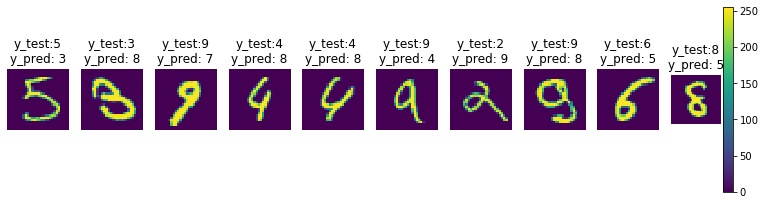

In [127]:
plt.figure(figsize=(13,13))
for i, j in zip(range(1, 11), bad_pred.index[:10]):
    plt.subplot(1,10,i)
    plt.axis('off') 
    plt.imshow(X_test[j])
    plt.title('y_test:' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]))
plt.colorbar()
plt.show()